In [140]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

<center><h1 style="color:red;">On Aggregating Probabilistic Argument Graphs from Multiple Agents and Assigning Graphs to Query Agents</h1></center>

<center><h2 style="color:red;">Abstract</h2></center>
In this paper we explore the problem of creating a probability distribution across argument graphs when collecting arguments and preferences from multiple agents. An agent proposes a set of arguments and indicates which arguments they believe should be in the grounded extension of any graph containing those arguments proposed. We propose 5 functions which aggregate probability graphs from such agents.
We also demonstrate a use of such a probabilty distribution by investigating some ways in which we can assign a probabilty graph and a polarity to <b>query</b> agents who do not indicate a preference to any of their arguments. We define some desirable properties for such a system and demonstrate our approaches through experimental results

<center><h2 style="color:red;">Creating A Probabilty Distribution of Graphs from Multiple Agents</h2></center>

<center><h3>Desirable Properties</h3></center>

Here we propose some properties that we expect to hold for any approach. Following this we introduce 5 aggregation approaches and conclude by assesing how many of these properties hold for each approach

<ol>
<li>$ F([(P_1,G_1)]) = (P_1,G_1)$ - Identity</li>
    <ul>
    <li>if only one agent is used in the aggregation then the resulting probability distribution should be the same as the input agent </li>
    </ul>
    <br>
    

<li>$ F([(P_1,G_1),(P_1,G_1),(P_1,G_1)]) = (P_1,G_1)$</li>
    <ul>
    <li>If all agents used in the aggregation are the same, then the resulting probability distribution should be the same as the one of the agents </li>
    </ul>
    <br>
    
<li>$ F([(P_1,G_1),(P_2,G_2),(P_3,G_4)]) \equiv F([(P_2,G_2),(P_1,G_1),(P_3,G_4)])$ - Symmetry</li>
    <ul>
    <li>The order in which agents are aggregated should not affect the outcome</li>
    </ul>
    <br>
    
<li>$ F([(P_1,G_1)...(P_n,G_n)]) = (P,G)$</li>
    <ul>
    <li>Given a set of probability distributions accross graphs we always expect some aggregation to occur</li>
    </ul>
    <br>
    
<li>$ F([(P_1,G)...(P_2,G)]) = (P,G)$</li>
    <ul>
    <li>We expect normality from a set of graphs. That is to say that when aggregating probabilistic graphs from agents proposing exactly the same set of arguments yet different polarites we should see that the resulting distribution is a reflection of ratio of positive:negative agents</li>
    </ul>
    <br>
   
<li>$ F([(P_1,G)...(P_n,G)]) = (P,G)$ and $P s.t \sum_{n=1}^{\infty} n = distance(P,P_i)$ is minimal</li>
    <ul>
    <li>When measuring subsequent distributions we expect the distance to be minimal</li>
    </ul>
    <br>
   
</ol>

<center><h3>Approaches</h3></center>

In the following we propose 5 approaches to producing a probability distribution given a collection of agents. Each approach is illustrated through an example, furthermore the intuition of each approach is explained.  

<h3>Approach 1 - No Enrichment</h3>

In this approach we say that an agent can only distribute mass into argument graphs that contain exactly the arguments proposed by the agent. For example let us say we have three arguments [a,b,c]. Arguments [a,c] form a coalition and argument [b] is in its own coaltion. For ease of reference we will call the set [a,c] postive arguments and the set [b] negative arguments.

Two agents <b>x</b> and <b>y</b> propose the followning:

<ul>
<li>Agent <b>x</b> proposes arguments [a,b,c]. Furthermore x proposes that the grounded extension of any graph and subgraph of arguments [a,b,c] should be positive (i.e. should contain only positive arguments)</li>

<li>Agent <b>x</b> proposes arguments [a,b]. Furthermore y proposes that the grounded extension of any graph and subgraph of arguments [a,b,c] should also be positive</li>
</ul>

The resulting distribution arises under Approach 1 and our example


<style type="text/css">
	table.tableizer-table {
		font-size: 12px;
		border: 1px solid #CCC; 
		font-family: Arial, Helvetica, sans-serif;
	} 
	.tableizer-table td {
		padding: 4px;
		margin: 3px;
		border: 1px solid #CCC;
	}
	.tableizer-table th {
		background-color: #104E8B; 
		color: #FFF;
		font-weight: bold;
	}
</style>
<table class="tableizer-table">
<thead><tr class="tableizer-firstrow"><th></th><th>&nbsp;</th><th>&nbsp;</th><th>&nbsp;</th><th>&nbsp;</th><th>&nbsp;</th><th>Agents</th><th>&nbsp;</th><th>&nbsp;</th><th>&nbsp;</th></tr></thead><tbody>
 <tr><td>Graphs</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>x</td><td>y</td><td>&nbsp;</td><td>Net of all Agents</td></tr>
 <tr><td>A </td><td>→</td><td>B</td><td>→</td><td>C</td><td>&nbsp;</td><td> 1/7</td><td>&nbsp;</td><td>&nbsp;</td><td>0.071</td></tr>
 <tr><td>A </td><td>→</td><td>B</td><td>←</td><td>C</td><td>&nbsp;</td><td> 1/7</td><td>&nbsp;</td><td>&nbsp;</td><td>0.071</td></tr>
 <tr><td>A </td><td>→</td><td>B</td><td>↔</td><td>C</td><td>&nbsp;</td><td> 1/7</td><td>&nbsp;</td><td>&nbsp;</td><td>0.071</td></tr>
 <tr><td>A </td><td>→</td><td>B</td><td>&nbsp;</td><td>C</td><td>&nbsp;</td><td> 1/7</td><td>&nbsp;</td><td>&nbsp;</td><td>0.071</td></tr>
 <tr><td>A </td><td>←</td><td>B</td><td>→</td><td>C</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>0.000</td></tr>
 <tr><td>A </td><td>←</td><td>B</td><td>←</td><td>C</td><td>&nbsp;</td><td> 1/7</td><td>&nbsp;</td><td>&nbsp;</td><td>0.071</td></tr>
 <tr><td>A </td><td>←</td><td>B</td><td>↔</td><td>C</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>0.000</td></tr>
 <tr><td>A </td><td>←</td><td>B</td><td>&nbsp;</td><td>C</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>0.000</td></tr>
 <tr><td>A </td><td>↔</td><td>B</td><td>→</td><td>C</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>0.000</td></tr>
 <tr><td>A </td><td>↔</td><td>B</td><td>←</td><td>C</td><td>&nbsp;</td><td> 1/7</td><td>&nbsp;</td><td>&nbsp;</td><td>0.071</td></tr>
 <tr><td>A </td><td>↔</td><td>B</td><td>↔</td><td>C</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>0.000</td></tr>
 <tr><td>A </td><td>↔</td><td>B</td><td>&nbsp;</td><td>C</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>0.000</td></tr>
 <tr><td>A </td><td>&nbsp;</td><td>B</td><td>→</td><td>C</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>0.000</td></tr>
 <tr><td>A </td><td>&nbsp;</td><td>B</td><td>←</td><td>C</td><td>&nbsp;</td><td> 1/7</td><td>&nbsp;</td><td>&nbsp;</td><td>0.071</td></tr>
 <tr><td>A </td><td>&nbsp;</td><td>B</td><td>↔</td><td>C</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>0.000</td></tr>
 <tr><td>A </td><td>&nbsp;</td><td>B</td><td>&nbsp;</td><td>C</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>0.000</td></tr>
 <tr><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>0.000</td></tr>
 <tr><td>A</td><td>→</td><td>B</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>0.000</td></tr>
 <tr><td>A</td><td>←</td><td>B</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>1    </td><td>&nbsp;</td><td>0.500</td></tr>
 <tr><td>A</td><td>↔</td><td>B</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>0.000</td></tr>
 <tr><td>A</td><td>&nbsp;</td><td>B</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>0.000</td></tr>
 <tr><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td></tr>
 <tr><td>&nbsp;</td><td>&nbsp;</td><td>B</td><td>→</td><td>C</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>0.000</td></tr>
 <tr><td>&nbsp;</td><td>&nbsp;</td><td>B</td><td>←</td><td>C</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>0.000</td></tr>
 <tr><td>&nbsp;</td><td>&nbsp;</td><td>B</td><td>↔</td><td>C</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>0.000</td></tr>
 <tr><td>&nbsp;</td><td>&nbsp;</td><td>B</td><td>&nbsp;</td><td>C</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>0.000</td></tr>
 <tr><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td></tr>
 <tr><td>A</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>C</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>0.000</td></tr>
 <tr><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td></tr>
 <tr><td>A</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>0.000</td></tr>
 <tr><td>&nbsp;</td><td>&nbsp;</td><td>B</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>0.000</td></tr>
 <tr><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>C</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>0.000</td></tr>
</tbody></table>

Below we plot the resulting probability distribution from Approach 1. Each marking on the x-axis is a different graph. The further you move down the x-axis the more arguments are removed from the graph. This means the <b>left-most</b> side contains the most nodes and the <b>right-most</b> side the argument graphs whic the least nodes/ single nodes

In [2]:
from numpy import inf
from numpy import nan
import math
import itertools
import ProbGraphGenerator as pg
import numpy as np
import pandas as pd
import itertools

posArgs = [0,1]
negArgs = [2]
allAgents = [([0, 1], [2], '+'), ([0], [2], '+')]

In [3]:
%%capture

graphDistribs = [] # Not needed when we have the graphDistribsGlobal
everyGraphProduced = np.unique(pg.generateGraphsGivenSetsOfArgs(posArgs, negArgs), axis=0)
graphDistribsGlobal = []
probDistribs = []
argumentsInAgents = []
polarities = []
agentsStringified = []

for agent in allAgents:
    graphDistribsGlobalAgents = []
    everyGraphProducedAgent = []
    agPosArgs = agent[0]
    agNegArgs = agent[1]
    polarity = agent[2]
    
    argumentsInAgents.append([agPosArgs + agNegArgs])
    polarities.append(polarity)
    
    agentsStringified.append(str(agent))
    
    # generate the plausible graphs for this agent
    posArgsIdx = list(range(0,len(agPosArgs)))
    negArgsIdx = list(range(len(agPosArgs), len(agPosArgs)+len(agNegArgs)))
    x,y = pg.calculateProbabilityDistribution(posArgsIdx, negArgsIdx, polarity)
    
    # Generate an initial probability distribution for these graphs
    initialProbDist = [1/len(x)] * len(x)
    graphDistribs.append(x)
    probDistribs.append(initialProbDist)
    
    # Convert the graphs into a global contribution, needed so that we can compare different agents of different sizes
    noArgTypes = len(posArgs) + len(negArgs)
    
    
    allAttacks = list(itertools.product(list(agPosArgs+agNegArgs), repeat=2))
    allAttacksIdx = []
    for attack in allAttacks:
        ptn = ((attack[0]+1)*noArgTypes)- ((noArgTypes+1) - attack[1])+1
        allAttacksIdx.append(ptn)
    
    for g in x:
        #globalContribution = np.zeros(noArgTypes*noArgTypes)
        globalContribution = np.full((noArgTypes*noArgTypes), np.inf)
        globalContribution[allAttacksIdx] = g
        graphDistribsGlobalAgents.append(globalContribution)
    
    graphDistribsGlobal.append(graphDistribsGlobalAgents)
    
    for g in y:
        #globalContribution = np.zeros(noArgTypes*noArgTypes)
        globalContribution = np.full((noArgTypes*noArgTypes), np.inf)
        globalContribution[allAttacksIdx] = g
    


In [4]:
%%capture
allProbDistribs = np.zeros((len(everyGraphProduced),len(graphDistribsGlobal)))

for agentIdx, agentGraphs in enumerate(graphDistribsGlobal):
    
    probDistrib = [0]*len(everyGraphProduced)
    
    for graph in agentGraphs:
        i = (np.where((everyGraphProduced == graph).all(axis=1)))[0][0]
        allProbDistribs[i,agentIdx] = 1



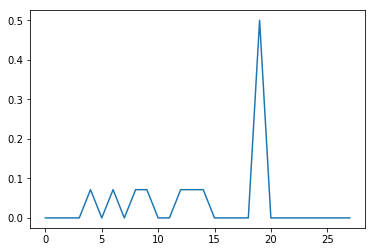

In [5]:

sumallProbDistribs = allProbDistribs / (allProbDistribs != 0).sum(0)
net = np.sum(sumallProbDistribs, axis=1) / len(allAgents)

%matplotlib inline
import matplotlib
matplotlib.rcParams['backend'] = "Qt4Agg"
import pylab
import numpy as np

x = range(0,len(net))  # 100 evenly-spaced values from 0 to 50

pylab.plot(x, net)

What can be seen here is that the agents are only distributing mass to those graphs that have exactly the same set of arguments 
the agent proposes.

<h3>Approach 2: Agent Can Enrich Graphs that have more Arguments than it Proposes</h3>

In this approach we say that an agent can distribute mass into argument graphs that contain exactly the arguments proposed by the agent <b>and</b> into graphs that have the same set of nodes as it and more nodes.

To illustrate this, if we continue with our previous example it means that agent <b>y</b> under this approach would be able to distribute mass to argument graphs which have nodes [a,b,c]. The table below shows the distribution of mass:


<style type="text/css">
	table.tableizer-table {
		font-size: 12px;
		border: 1px solid #CCC; 
		font-family: Arial, Helvetica, sans-serif;
	} 
	.tableizer-table td {
		padding: 4px;
		margin: 3px;
		border: 1px solid #CCC;
	}
	.tableizer-table th {
		background-color: #104E8B; 
		color: #FFF;
		font-weight: bold;
	}
</style>
<table class="tableizer-table">
<thead><tr class="tableizer-firstrow"><th></th><th>&nbsp;</th><th>&nbsp;</th><th>&nbsp;</th><th>&nbsp;</th><th>&nbsp;</th><th>Agents</th><th>&nbsp;</th><th>&nbsp;</th><th>&nbsp;</th></tr></thead><tbody>
 <tr><td>Graphs</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>x</td><td>y</td><td>&nbsp;</td><td>Net of all Agents</td></tr>
 <tr><td>A </td><td>→</td><td>B</td><td>→</td><td>C</td><td>&nbsp;</td><td> 1/7</td><td> 1/5</td><td>&nbsp;</td><td>0.171</td></tr>
 <tr><td>A </td><td>→</td><td>B</td><td>←</td><td>C</td><td>&nbsp;</td><td> 1/7</td><td> 1/5</td><td>&nbsp;</td><td>0.171</td></tr>
 <tr><td>A </td><td>→</td><td>B</td><td>↔</td><td>C</td><td>&nbsp;</td><td> 1/7</td><td> 1/5</td><td>&nbsp;</td><td>0.171</td></tr>
 <tr><td>A </td><td>→</td><td>B</td><td>&nbsp;</td><td>C</td><td>&nbsp;</td><td> 1/7</td><td> 1/5</td><td>&nbsp;</td><td>0.171</td></tr>
 <tr><td>A </td><td>←</td><td>B</td><td>→</td><td>C</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>0.000</td></tr>
 <tr><td>A </td><td>←</td><td>B</td><td>←</td><td>C</td><td>&nbsp;</td><td> 1/7</td><td>&nbsp;</td><td>&nbsp;</td><td>0.071</td></tr>
 <tr><td>A </td><td>←</td><td>B</td><td>↔</td><td>C</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>0.000</td></tr>
 <tr><td>A </td><td>←</td><td>B</td><td>&nbsp;</td><td>C</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>0.000</td></tr>
 <tr><td>A </td><td>↔</td><td>B</td><td>→</td><td>C</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>0.000</td></tr>
 <tr><td>A </td><td>↔</td><td>B</td><td>←</td><td>C</td><td>&nbsp;</td><td> 1/7</td><td>&nbsp;</td><td>&nbsp;</td><td>0.071</td></tr>
 <tr><td>A </td><td>↔</td><td>B</td><td>↔</td><td>C</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>0.000</td></tr>
 <tr><td>A </td><td>↔</td><td>B</td><td>&nbsp;</td><td>C</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>0.000</td></tr>
 <tr><td>A </td><td>&nbsp;</td><td>B</td><td>→</td><td>C</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>0.000</td></tr>
 <tr><td>A </td><td>&nbsp;</td><td>B</td><td>←</td><td>C</td><td>&nbsp;</td><td> 1/7</td><td>&nbsp;</td><td>&nbsp;</td><td>0.071</td></tr>
 <tr><td>A </td><td>&nbsp;</td><td>B</td><td>↔</td><td>C</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>0.000</td></tr>
 <tr><td>A </td><td>&nbsp;</td><td>B</td><td>&nbsp;</td><td>C</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>0.000</td></tr>
 <tr><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td></tr>
 <tr><td>A</td><td>→</td><td>B</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td> 1/5</td><td>&nbsp;</td><td>0.100</td></tr>
 <tr><td>A</td><td>←</td><td>B</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>0.000</td></tr>
 <tr><td>A</td><td>↔</td><td>B</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>0.000</td></tr>
 <tr><td>A</td><td>&nbsp;</td><td>B</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>0.000</td></tr>
 <tr><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>0.000</td></tr>
 <tr><td>&nbsp;</td><td>&nbsp;</td><td>B</td><td>→</td><td>C</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td></tr>
 <tr><td>&nbsp;</td><td>&nbsp;</td><td>B</td><td>←</td><td>C</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>0.000</td></tr>
 <tr><td>&nbsp;</td><td>&nbsp;</td><td>B</td><td>↔</td><td>C</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>0.000</td></tr>
 <tr><td>&nbsp;</td><td>&nbsp;</td><td>B</td><td>&nbsp;</td><td>C</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>0.000</td></tr>
 <tr><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td></tr>
 <tr><td>A</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>C</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>0.000</td></tr>
 <tr><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td></tr>
 <tr><td>A</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>0.000</td></tr>
 <tr><td>&nbsp;</td><td>&nbsp;</td><td>B</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>0.000</td></tr>
 <tr><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>C</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>0.000</td></tr>
</tbody></table>

We can see that mass from agent <b>y</b> has now moved upwards into graphs containing more nodes. The graph below highlights the same. 

In [6]:
def checkBiDirAttacks(graph):
    
    argsList = range(0,int((math.sqrt(len(graph)))))
    dualLocations =  list(itertools.combinations(argsList, 2))
    
    for loc in dualLocations:

        noOfArgs = int(math.sqrt(len(graph)))
        pos = (loc[0] * noOfArgs) + loc[1]
        counterPos = (loc[1] * noOfArgs) + loc[0]
            
        net = graph[pos] + graph[counterPos]
        
        if net == 2:
            graph[pos] = 2
            graph[counterPos] = 2
        
    
    return graph

In [7]:
%%capture
allProbDistribs2 = np.zeros((len(everyGraphProduced),len(graphDistribsGlobal)))

pnts = range(0, int(math.sqrt(len(everyGraphProduced[0]))))
dualLocations = list(itertools.combinations(pnts, 2))

for agentIdx, agentGraphs in enumerate(graphDistribsGlobal):
    
    probDistrib = [0]*len(everyGraphProduced)
    
    print('changing agent-----*******')
    
    for graph in agentGraphs:

        for everyIdx, g in enumerate(everyGraphProduced):
            
            ginfs = np.sum(g == inf)
            agentinfs = np.sum(graph == inf)
            
            # If the agent is same than he can enrich
            if agentinfs == ginfs:
                i = (np.where((everyGraphProduced == graph).all(axis=1)))[0][0]
                allProbDistribs2[i,agentIdx] = 1
            
            # If the agent is smaller than he can enrich
            if agentinfs > ginfs:
                
                x = checkBiDirAttacks(np.copy(graph))
                y = checkBiDirAttacks(np.copy(g))
                
                multiple = x * y
                np.isnan(multiple)
                multiple[np.isnan(multiple)] = inf
                multiple[np.where(multiple==4)] = multiple[np.where(multiple==4)] / 2
                
                print(y)
                print(graph)
                print('-----------------')
                enrich = np.array_equal(multiple, graph)
                if enrich:
                    print(enrich)
                    allProbDistribs2[everyIdx,agentIdx] = 1
                
print(allProbDistribs2)                

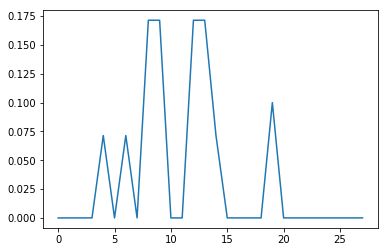

In [8]:
sumallProbDistribs2 = allProbDistribs2 / (allProbDistribs2 != 0).sum(0)
net2 = np.sum(sumallProbDistribs2, axis=1) / len(allAgents)

%matplotlib inline
import matplotlib
matplotlib.rcParams['backend'] = "Qt4Agg"
import pylab
import numpy as np

x = range(0,len(net))  # 100 evenly-spaced values from 0 to 50


pylab.plot(x, net2)
pylab.show()

We can see that because agent <b>y</b> has now shifted most of his mass to higher graphs the resulting distribution has most of its mass in the higher graphs too

<h3>Approach 3: Agent Can Enrich Graphs that have fewer Arguments than it Proposes</h3>

In this approach we say that an agent can distribute mass into argument graphs that contain exactly the arguments proposed by the agent <b>and</b> into graphs that have fewer nodes than it.

To illustrate this, if we continue with our previous example it means that agent <b>x</b> under this approach would be able to distribute mass into all argument graphs and agent <b>y</b> into lower graphs as well. The table below shows the distribution of mass:



<style type="text/css">
	table.tableizer-table {
		font-size: 12px;
		border: 1px solid #CCC; 
		font-family: Arial, Helvetica, sans-serif;
	} 
	.tableizer-table td {
		padding: 4px;
		margin: 3px;
		border: 1px solid #CCC;
	}
	.tableizer-table th {
		background-color: #104E8B; 
		color: #FFF;
		font-weight: bold;
	}
</style>
<table class="tableizer-table">
<thead><tr class="tableizer-firstrow"><th></th><th>&nbsp;</th><th>&nbsp;</th><th>&nbsp;</th><th>&nbsp;</th><th>&nbsp;</th><th>Agents</th><th>&nbsp;</th><th>&nbsp;</th><th>&nbsp;</th></tr></thead><tbody>
 <tr><td>Graphs</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>x</td><td>y</td><td>&nbsp;</td><td>Net of all Agents</td></tr>
 <tr><td>A </td><td>→</td><td>B</td><td>→</td><td>C</td><td>&nbsp;</td><td>   1/12 </td><td> 1/7</td><td>&nbsp;</td><td>0.113</td></tr>
 <tr><td>A </td><td>→</td><td>B</td><td>←</td><td>C</td><td>&nbsp;</td><td>   1/12 </td><td> 1/7</td><td>&nbsp;</td><td>0.113</td></tr>
 <tr><td>A </td><td>→</td><td>B</td><td>↔</td><td>C</td><td>&nbsp;</td><td>   1/12 </td><td> 1/7</td><td>&nbsp;</td><td>0.113</td></tr>
 <tr><td>A </td><td>→</td><td>B</td><td>&nbsp;</td><td>C</td><td>&nbsp;</td><td>   1/12 </td><td> 1/7</td><td>&nbsp;</td><td>0.113</td></tr>
 <tr><td>A </td><td>←</td><td>B</td><td>→</td><td>C</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>0.000</td></tr>
 <tr><td>A </td><td>←</td><td>B</td><td>←</td><td>C</td><td>&nbsp;</td><td>   1/12 </td><td>&nbsp;</td><td>&nbsp;</td><td>0.042</td></tr>
 <tr><td>A </td><td>←</td><td>B</td><td>↔</td><td>C</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>0.000</td></tr>
 <tr><td>A </td><td>←</td><td>B</td><td>&nbsp;</td><td>C</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>0.000</td></tr>
 <tr><td>A </td><td>↔</td><td>B</td><td>→</td><td>C</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>0.000</td></tr>
 <tr><td>A </td><td>↔</td><td>B</td><td>←</td><td>C</td><td>&nbsp;</td><td>   1/12 </td><td>&nbsp;</td><td>&nbsp;</td><td>0.042</td></tr>
 <tr><td>A </td><td>↔</td><td>B</td><td>↔</td><td>C</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>0.000</td></tr>
 <tr><td>A </td><td>↔</td><td>B</td><td>&nbsp;</td><td>C</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>0.000</td></tr>
 <tr><td>A </td><td>&nbsp;</td><td>B</td><td>→</td><td>C</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>0.000</td></tr>
 <tr><td>A </td><td>&nbsp;</td><td>B</td><td>←</td><td>C</td><td>&nbsp;</td><td>   1/12 </td><td>&nbsp;</td><td>&nbsp;</td><td>0.042</td></tr>
 <tr><td>A </td><td>&nbsp;</td><td>B</td><td>↔</td><td>C</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>0.000</td></tr>
 <tr><td>A </td><td>&nbsp;</td><td>B</td><td>&nbsp;</td><td>C</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>0.000</td></tr>
 <tr><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td></tr>
 <tr><td>A</td><td>→</td><td>B</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>   1/12 </td><td> 1/7</td><td>&nbsp;</td><td>0.113</td></tr>
 <tr><td>A</td><td>←</td><td>B</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>0.000</td></tr>
 <tr><td>A</td><td>↔</td><td>B</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>0.000</td></tr>
 <tr><td>A</td><td>&nbsp;</td><td>B</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>0.000</td></tr>
 <tr><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td></tr>
 <tr><td>&nbsp;</td><td>&nbsp;</td><td>B</td><td>→</td><td>C</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>0.000</td></tr>
 <tr><td>&nbsp;</td><td>&nbsp;</td><td>B</td><td>←</td><td>C</td><td>&nbsp;</td><td>   1/12 </td><td>&nbsp;</td><td>&nbsp;</td><td>0.042</td></tr>
 <tr><td>&nbsp;</td><td>&nbsp;</td><td>B</td><td>↔</td><td>C</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>0.000</td></tr>
 <tr><td>&nbsp;</td><td>&nbsp;</td><td>B</td><td>&nbsp;</td><td>C</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>0.000</td></tr>
 <tr><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td></tr>
 <tr><td>A</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>C</td><td>&nbsp;</td><td>   1/12 </td><td>&nbsp;</td><td>&nbsp;</td><td>0.042</td></tr>
 <tr><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>0.000</td></tr>
 <tr><td>A</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>   1/12 </td><td> 1/7</td><td>&nbsp;</td><td>0.113</td></tr>
 <tr><td>&nbsp;</td><td>&nbsp;</td><td>B</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>0.000</td></tr>
 <tr><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>C</td><td>&nbsp;</td><td>   1/12 </td><td>&nbsp;</td><td>&nbsp;</td><td>0.042</td></tr>
</tbody></table>

We can see that now agents both agents are now contributing mass to more graphs in this example there is a tendency for mass to accumulate in smaller graphs. The graph below highlights this shift

In [9]:
%%capture
allProbDistribs3 = np.zeros((len(everyGraphProduced),len(graphDistribsGlobal)))

pnts = range(0, int(math.sqrt(len(everyGraphProduced[0]))))
dualLocations = list(itertools.combinations(pnts, 2))

for agentIdx, agentGraphs in enumerate(graphDistribsGlobal):
    
    probDistrib = [0]*len(everyGraphProduced)
    
    print('changing agent-----*******')
    
    for graph in agentGraphs:

        for everyIdx, g in enumerate(everyGraphProduced):
            
            ginfs = np.sum(g == inf)
            agentinfs = np.sum(graph == inf)
            
            # If the agent is same than he can enrich
            if agentinfs == ginfs:
                i = (np.where((everyGraphProduced == graph).all(axis=1)))[0][0]
                allProbDistribs3[i,agentIdx] = 1
            
            # If the agent is larger than he can enrich
            if agentinfs < ginfs:
                
                x = checkBiDirAttacks(np.copy(graph))
                y = checkBiDirAttacks(np.copy(g))
                
                multiple = x * y
                np.isnan(multiple)
                multiple[np.isnan(multiple)] = inf
                multiple[np.where(multiple==4)] = multiple[np.where(multiple==4)] / 2
                
                print(y)
                print(graph)
                print('-----------------')
                enrich = np.array_equal(multiple, y)
                polarityMatch = (polarities[agentIdx] == pg.getGraphPolarityMixedGraphSize(g, posArgs, negArgs))
                if enrich and polarityMatch:
                    print(enrich)
                    allProbDistribs3[everyIdx,agentIdx] = 1
                
print(allProbDistribs3)     

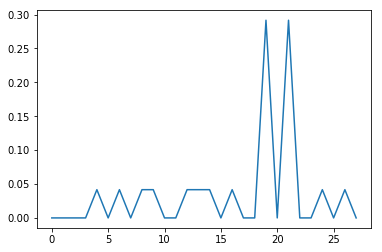

In [10]:
sumallProbDistribs3 = allProbDistribs3 / (allProbDistribs3 != 0).sum(0)
net3 = np.sum(sumallProbDistribs3, axis=1) /  len(allAgents)

%matplotlib inline
import matplotlib
matplotlib.rcParams['backend'] = "Qt4Agg"
import pylab
import numpy as np


x = range(0,len(net))  # 100 evenly-spaced values from 0 to 50


pylab.plot(x, net3)
pylab.show()

<h3>Approach 4: Agent Can Enrich Graphs that have both fewer and more Arguments than it Proposes</h3>

This approach is a combination of approach 2 and 3. The table below shows the resulting probability distribution.

<style type="text/css">
	table.tableizer-table {
		font-size: 12px;
		border: 1px solid #CCC; 
		font-family: Arial, Helvetica, sans-serif;
	} 
	.tableizer-table td {
		padding: 4px;
		margin: 3px;
		border: 1px solid #CCC;
	}
	.tableizer-table th {
		background-color: #104E8B; 
		color: #FFF;
		font-weight: bold;
	}
</style>
<table class="tableizer-table">
<thead><tr class="tableizer-firstrow"><th></th><th>&nbsp;</th><th>&nbsp;</th><th>&nbsp;</th><th>&nbsp;</th><th>&nbsp;</th><th>Agents</th><th>&nbsp;</th><th>&nbsp;</th><th>&nbsp;</th></tr></thead><tbody>
 <tr><td>Graphs</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>x</td><td>y</td><td>&nbsp;</td><td>Net of all Agents</td></tr>
 <tr><td>A </td><td>→</td><td>B</td><td>→</td><td>C</td><td>&nbsp;</td><td>   1/12 </td><td> 1/7</td><td>&nbsp;</td><td>0.113</td></tr>
 <tr><td>A </td><td>→</td><td>B</td><td>←</td><td>C</td><td>&nbsp;</td><td>   1/12 </td><td> 1/7</td><td>&nbsp;</td><td>0.113</td></tr>
 <tr><td>A </td><td>→</td><td>B</td><td>↔</td><td>C</td><td>&nbsp;</td><td>   1/12 </td><td> 1/7</td><td>&nbsp;</td><td>0.113</td></tr>
 <tr><td>A </td><td>→</td><td>B</td><td>&nbsp;</td><td>C</td><td>&nbsp;</td><td>   1/12 </td><td> 1/7</td><td>&nbsp;</td><td>0.113</td></tr>
 <tr><td>A </td><td>←</td><td>B</td><td>→</td><td>C</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>0.000</td></tr>
 <tr><td>A </td><td>←</td><td>B</td><td>←</td><td>C</td><td>&nbsp;</td><td>   1/12 </td><td>&nbsp;</td><td>&nbsp;</td><td>0.042</td></tr>
 <tr><td>A </td><td>←</td><td>B</td><td>↔</td><td>C</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>0.000</td></tr>
 <tr><td>A </td><td>←</td><td>B</td><td>&nbsp;</td><td>C</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>0.000</td></tr>
 <tr><td>A </td><td>↔</td><td>B</td><td>→</td><td>C</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>0.000</td></tr>
 <tr><td>A </td><td>↔</td><td>B</td><td>←</td><td>C</td><td>&nbsp;</td><td>   1/12 </td><td>&nbsp;</td><td>&nbsp;</td><td>0.042</td></tr>
 <tr><td>A </td><td>↔</td><td>B</td><td>↔</td><td>C</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>0.000</td></tr>
 <tr><td>A </td><td>↔</td><td>B</td><td>&nbsp;</td><td>C</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>0.000</td></tr>
 <tr><td>A </td><td>&nbsp;</td><td>B</td><td>→</td><td>C</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>0.000</td></tr>
 <tr><td>A </td><td>&nbsp;</td><td>B</td><td>←</td><td>C</td><td>&nbsp;</td><td>   1/12 </td><td>&nbsp;</td><td>&nbsp;</td><td>0.042</td></tr>
 <tr><td>A </td><td>&nbsp;</td><td>B</td><td>↔</td><td>C</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>0.000</td></tr>
 <tr><td>A </td><td>&nbsp;</td><td>B</td><td>&nbsp;</td><td>C</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>0.000</td></tr>
 <tr><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td></tr>
 <tr><td>A</td><td>→</td><td>B</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>   1/12 </td><td> 1/7</td><td>&nbsp;</td><td>0.113</td></tr>
 <tr><td>A</td><td>←</td><td>B</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>0.000</td></tr>
 <tr><td>A</td><td>↔</td><td>B</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>0.000</td></tr>
 <tr><td>A</td><td>&nbsp;</td><td>B</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>0.000</td></tr>
 <tr><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td></tr>
 <tr><td>&nbsp;</td><td>&nbsp;</td><td>B</td><td>→</td><td>C</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>0.000</td></tr>
 <tr><td>&nbsp;</td><td>&nbsp;</td><td>B</td><td>←</td><td>C</td><td>&nbsp;</td><td>   1/12 </td><td>&nbsp;</td><td>&nbsp;</td><td>0.042</td></tr>
 <tr><td>&nbsp;</td><td>&nbsp;</td><td>B</td><td>↔</td><td>C</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>0.000</td></tr>
 <tr><td>&nbsp;</td><td>&nbsp;</td><td>B</td><td>&nbsp;</td><td>C</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>0.000</td></tr>
 <tr><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td></tr>
 <tr><td>A</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>C</td><td>&nbsp;</td><td>   1/12 </td><td>&nbsp;</td><td>&nbsp;</td><td>0.042</td></tr>
 <tr><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>0.000</td></tr>
 <tr><td>A</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>   1/12 </td><td> 1/7</td><td>&nbsp;</td><td>0.113</td></tr>
 <tr><td>&nbsp;</td><td>&nbsp;</td><td>B</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>0.000</td></tr>
 <tr><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>C</td><td>&nbsp;</td><td>   1/12 </td><td>&nbsp;</td><td>&nbsp;</td><td>0.042</td></tr>
</tbody></table>

The graph below shows clearly how this approach is a combination of approaches 2 and 3. The left portion of the graph resembles the left portion of approach 2 whilst the right portion the right portion of approach 3.

In [11]:
%%capture
allProbDistribs4 = np.zeros((len(everyGraphProduced),len(graphDistribsGlobal)))

pnts = range(0, int(math.sqrt(len(everyGraphProduced[0]))))
dualLocations = list(itertools.combinations(pnts, 2))

for agentIdx, agentGraphs in enumerate(graphDistribsGlobal):
    
    probDistrib = [0]*len(everyGraphProduced)
    
    print('changing agent-----*******')
    
    for graph in agentGraphs:

        for everyIdx, g in enumerate(everyGraphProduced):
            
            ginfs = np.sum(g == inf)
            agentinfs = np.sum(graph == inf)
            
            # If the agent is same than he can enrich
            if agentinfs == ginfs:
                i = (np.where((everyGraphProduced == graph).all(axis=1)))[0][0]
                allProbDistribs4[i,agentIdx] = 1
            
            # If the agent is smaller than he can enrich
            if agentinfs > ginfs:
                
                x = checkBiDirAttacks(np.copy(graph))
                y = checkBiDirAttacks(np.copy(g))
                
                multiple = x * y
                np.isnan(multiple)
                multiple[np.isnan(multiple)] = inf
                multiple[np.where(multiple==4)] = multiple[np.where(multiple==4)] / 2
                
                print(y)
                print(graph)
                print('-----------------')
                enrich = np.array_equal(multiple, graph)
                if enrich:
                    print(enrich)
                    allProbDistribs4[everyIdx,agentIdx] = 1
            
            # If the agent is larger than he can enrich
            if agentinfs < ginfs:
                
                x = checkBiDirAttacks(np.copy(graph))
                y = checkBiDirAttacks(np.copy(g))
                
                multiple = x * y
                np.isnan(multiple)
                multiple[np.isnan(multiple)] = inf
                multiple[np.where(multiple==4)] = multiple[np.where(multiple==4)] / 2
                
                print(y)
                print(graph)
                print('-----------------')
                enrich = np.array_equal(multiple, y)
                polarityMatch = (polarities[agentIdx] == pg.getGraphPolarityMixedGraphSize(g, posArgs, negArgs))
                if enrich and polarityMatch:
                    print(enrich)
                    allProbDistribs4[everyIdx,agentIdx] = 1
                
print(allProbDistribs4)          

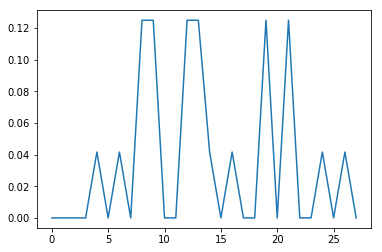

In [12]:
sumallProbDistribs4 = allProbDistribs4 / (allProbDistribs4 != 0).sum(0)
net4 = np.sum(sumallProbDistribs4, axis=1) / len(allAgents)

%matplotlib inline
import matplotlib
matplotlib.rcParams['backend'] = "Qt4Agg"
import pylab
import numpy as np


x = range(0,len(net))  # 100 evenly-spaced values from 0 to 50


pylab.plot(x, net4)
pylab.show()

<h3>Approach 5: Agent Enriches The Largest Graphs</h3>

In this approach an agent places all of his mass to the largest graphs. So using our example we would see that agent <b>y</b> in this case would place all of his mass in graphs containing arguments [a,b,c]

The table below shows the resulting distribution

<style type="text/css">
	table.tableizer-table {
		font-size: 12px;
		border: 1px solid #CCC; 
		font-family: Arial, Helvetica, sans-serif;
	} 
	.tableizer-table td {
		padding: 4px;
		margin: 3px;
		border: 1px solid #CCC;
	}
	.tableizer-table th {
		background-color: #104E8B; 
		color: #FFF;
		font-weight: bold;
	}
</style>
<table class="tableizer-table">
<thead><tr class="tableizer-firstrow"><th></th><th>&nbsp;</th><th>&nbsp;</th><th>&nbsp;</th><th>&nbsp;</th><th>&nbsp;</th><th>Agents</th><th>&nbsp;</th><th>&nbsp;</th><th>&nbsp;</th></tr></thead><tbody>
 <tr><td>Graphs</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>x</td><td>y</td><td>&nbsp;</td><td>Net of all Agents</td></tr>
 <tr><td>A </td><td>→</td><td>B</td><td>→</td><td>C</td><td>&nbsp;</td><td> 1/7</td><td> 1/4</td><td>&nbsp;</td><td>0.196</td></tr>
 <tr><td>A </td><td>→</td><td>B</td><td>←</td><td>C</td><td>&nbsp;</td><td> 1/7</td><td> 1/4</td><td>&nbsp;</td><td>0.196</td></tr>
 <tr><td>A </td><td>→</td><td>B</td><td>↔</td><td>C</td><td>&nbsp;</td><td> 1/7</td><td> 1/4</td><td>&nbsp;</td><td>0.196</td></tr>
 <tr><td>A </td><td>→</td><td>B</td><td>&nbsp;</td><td>C</td><td>&nbsp;</td><td> 1/7</td><td> 1/4</td><td>&nbsp;</td><td>0.196</td></tr>
 <tr><td>A </td><td>←</td><td>B</td><td>→</td><td>C</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>0.000</td></tr>
 <tr><td>A </td><td>←</td><td>B</td><td>←</td><td>C</td><td>&nbsp;</td><td> 1/7</td><td>&nbsp;</td><td>&nbsp;</td><td>0.071</td></tr>
 <tr><td>A </td><td>←</td><td>B</td><td>↔</td><td>C</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>0.000</td></tr>
 <tr><td>A </td><td>←</td><td>B</td><td>&nbsp;</td><td>C</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>0.000</td></tr>
 <tr><td>A </td><td>↔</td><td>B</td><td>→</td><td>C</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>0.000</td></tr>
 <tr><td>A </td><td>↔</td><td>B</td><td>←</td><td>C</td><td>&nbsp;</td><td> 1/7</td><td>&nbsp;</td><td>&nbsp;</td><td>0.071</td></tr>
 <tr><td>A </td><td>↔</td><td>B</td><td>↔</td><td>C</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>0.000</td></tr>
 <tr><td>A </td><td>↔</td><td>B</td><td>&nbsp;</td><td>C</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>0.000</td></tr>
 <tr><td>A </td><td>&nbsp;</td><td>B</td><td>→</td><td>C</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>0.000</td></tr>
 <tr><td>A </td><td>&nbsp;</td><td>B</td><td>←</td><td>C</td><td>&nbsp;</td><td> 1/7</td><td>&nbsp;</td><td>&nbsp;</td><td>0.071</td></tr>
 <tr><td>A </td><td>&nbsp;</td><td>B</td><td>↔</td><td>C</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>0.000</td></tr>
 <tr><td>A </td><td>&nbsp;</td><td>B</td><td>&nbsp;</td><td>C</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>0.000</td></tr>
 <tr><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>0.000</td></tr>
 <tr><td>A</td><td>→</td><td>B</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>0.000</td></tr>
 <tr><td>A</td><td>←</td><td>B</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>0.000</td></tr>
 <tr><td>A</td><td>↔</td><td>B</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>0.000</td></tr>
 <tr><td>A</td><td>&nbsp;</td><td>B</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>0.000</td></tr>
 <tr><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td></tr>
 <tr><td>&nbsp;</td><td>&nbsp;</td><td>B</td><td>→</td><td>C</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>0.000</td></tr>
 <tr><td>&nbsp;</td><td>&nbsp;</td><td>B</td><td>←</td><td>C</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>0.000</td></tr>
 <tr><td>&nbsp;</td><td>&nbsp;</td><td>B</td><td>↔</td><td>C</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>0.000</td></tr>
 <tr><td>&nbsp;</td><td>&nbsp;</td><td>B</td><td>&nbsp;</td><td>C</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>0.000</td></tr>
 <tr><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td></tr>
 <tr><td>A</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>C</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>0.000</td></tr>
 <tr><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td></tr>
 <tr><td>A</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>0.000</td></tr>
 <tr><td>&nbsp;</td><td>&nbsp;</td><td>B</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>0.000</td></tr>
 <tr><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>C</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>0.000</td></tr>
</tbody></table>

We can see that as a consequence of this the mass has all shifted to the larger graphs and more explicitly when a ⇾ b is present in those graphs the mass spikes as these are the graphs were agent <b>x</b> and agent <b>y</b> share in common. The graphs below illustrates this effect

In [13]:
%%capture
allProbDistribs5 = np.zeros((len(everyGraphProduced),len(graphDistribsGlobal)))

pnts = range(0, int(math.sqrt(len(everyGraphProduced[0]))))
dualLocations = list(itertools.combinations(pnts, 2))

for agentIdx, agentGraphs in enumerate(graphDistribsGlobal):
    
    probDistrib = [0]*len(everyGraphProduced)
    
    print('changing agent-----*******')
    
    for graph in agentGraphs:

        for everyIdx, g in enumerate(everyGraphProduced):
            
            ginfs = np.sum(g == inf)
            agentinfs = np.sum(graph == inf)
            
            # If the agent is smaller than he can enrich
            # we will check to see if the graph comparing too is the largest graph
            if ginfs == 0:
                
                x = checkBiDirAttacks(np.copy(graph))
                y = checkBiDirAttacks(np.copy(g))
                
                multiple = x * y
                np.isnan(multiple)
                multiple[np.isnan(multiple)] = inf
                multiple[np.where(multiple==4)] = multiple[np.where(multiple==4)] / 2
                
                print(y)
                print(graph)
                print('-----------------')
                enrich = np.array_equal(multiple, graph)
                if enrich:
                    print(enrich)
                    allProbDistribs5[everyIdx,agentIdx] = 1
                
print(allProbDistribs5)     

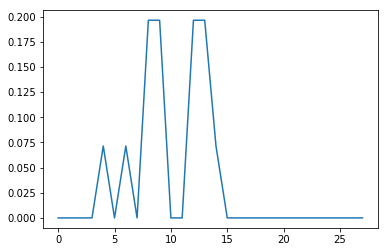

In [14]:
sumallProbDistribs5 = allProbDistribs5 / (allProbDistribs5 != 0).sum(0)
net5 = np.sum(sumallProbDistribs5, axis=1) / len(allAgents)

%matplotlib inline
import matplotlib
matplotlib.rcParams['backend'] = "Qt4Agg"
import pylab
import numpy as np


x = range(0,len(net))  # 100 evenly-spaced values from 0 to 50


pylab.plot(x, net5)
pylab.show()

<center><h3>Comparison of Approaches</h3></center>

So far we have introduced five approaches for producing a probability distribution for all subgraphs of a given set of arguments, with agents proposing a subset of these arguments and a preference to how grounded extensions of these graphs should be. Each approach differs in the way agents can distribute mass to the subgraphs. 

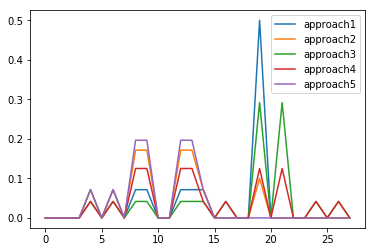

In [26]:
sumallProbDistribs = allProbDistribs / (allProbDistribs != 0).sum(0)
sumallProbDistribs2 = allProbDistribs2 / (allProbDistribs2 != 0).sum(0)
sumallProbDistribs3 = allProbDistribs3 / (allProbDistribs3 != 0).sum(0)
sumallProbDistribs4 = allProbDistribs4 / (allProbDistribs4 != 0).sum(0)
sumallProbDistribs5 = allProbDistribs5 / (allProbDistribs5 != 0).sum(0)

net = np.sum(sumallProbDistribs, axis=1) / len(allAgents)
net2 = np.sum(sumallProbDistribs2, axis=1) / len(allAgents)
net3 = np.sum(sumallProbDistribs3, axis=1) /  len(allAgents)
net4 = np.sum(sumallProbDistribs4, axis=1) / len(allAgents)
net5 = np.sum(sumallProbDistribs5, axis=1) / len(allAgents)

%matplotlib inline
import matplotlib
matplotlib.rcParams['backend'] = "Qt4Agg"
import pylab
import numpy as np


x = range(0,len(net))  # 100 evenly-spaced values from 0 to 50


pylab.plot(x, net, label='approach1')
pylab.plot(x, net2, label='approach2')
pylab.plot(x, net3, label='approach3')
pylab.plot(x, net4, label='approach4')
pylab.plot(x, net5, label='approach5')
pylab.legend()
pylab.show()

Earlier we defined some desirable properties that we would expect of any aggregation approach. It was also found that all desirable properties described earlier on held for all approaches. 

# TODO - See if property 6 holds



<center><h2 style="color:red;">Using the Probability Distribution To Assign a Graph to a Query Agent</h2></center>

The probability distributions produced by the 5 approaches in the previous section can be used for agents who do not provide a preference over the grounded extensions, i.e. agents who only propose arguments. We reffer to these agents as <b>query</b> agents as we view them as querying the probability distribution to see which graphs would likely suite them based on their proposed arguments. 

<center><h3>Desirable Properties</h3></center>

Query agents can thus be of a few types:

<ul>
<li><b>Query Agent Type 1</b>: Those who propose more arguments than the agents used to construct the probability distribution, i.e. proposes new arguments</li>
<li><b>Query Agent Type 2</b>: Those who propose a set arguments that have been proposed before. They do <b>not</b> propose fewer arguments to previous agents</li>
<li><b>Query Agent Type 3</b>: Those who propose fewer arguments than the agents used to construct the probability distribution</li>
</ul>

We would say a desirable property of any approach used to return a graph to a query agent should always ensure to return a graph so long as mass is present there


<center><h3>Approaches</h3></center>

In the following we introduce three approaches a query agents can take to make use of the probability distributiion:

<h3>Approach 1: The Grounded Extension of Any Graph Considered By Query Agent Should Contain All of the Arguments Proposed that It Contains</h3>

In this approach we say when a query agent proposes a set of arguments then those <b>all</b> of those arguments should be in the grounded extension of any graph offered to the agent.

If we continue our previous example and say that we now have a query agent <b>q</b> proposing argument C. In this case we see that the grounded extension of the graph should contain exactly C. The table below shows the grounded extensions of each of the subgraph from our example

<style type="text/css">
	table.tableizer-table {
		font-size: 12px;
		border: 1px solid #CCC; 
		font-family: Arial, Helvetica, sans-serif;
	} 
	.tableizer-table td {
		padding: 4px;
		margin: 3px;
		border: 1px solid #CCC;
	}
	.tableizer-table th {
		background-color: #104E8B; 
		color: #FFF;
		font-weight: bold;
	}
</style>
<table class="tableizer-table">
<thead><tr class="tableizer-firstrow"><th>No</th><th>Graphs</th><th>&nbsp;</th><th>&nbsp;</th><th>&nbsp;</th><th>&nbsp;</th><th>&nbsp;</th><th>Grounded Extension</th><th>Polarity</th></tr></thead><tbody>
 <tr><td>1</td><td>A </td><td>→</td><td>B</td><td>→</td><td>C</td><td>&nbsp;</td><td>A,C</td><td>Pos</td></tr>
 <tr><td>2</td><td>A </td><td>→</td><td>B</td><td>←</td><td>C</td><td>&nbsp;</td><td>A,C</td><td>Pos</td></tr>
 <tr><td>3</td><td>A </td><td>→</td><td>B</td><td>↔</td><td>C</td><td>&nbsp;</td><td>A,C</td><td>Pos</td></tr>
 <tr><td>4</td><td>A </td><td>→</td><td>B</td><td>&nbsp;</td><td>C</td><td>&nbsp;</td><td>A,C</td><td>Pos</td></tr>
 <tr><td>5</td><td>A </td><td>←</td><td>B</td><td>→</td><td>C</td><td>&nbsp;</td><td>B</td><td>Neg</td></tr>
 <tr><td>6</td><td>A </td><td>←</td><td>B</td><td>←</td><td>C</td><td>&nbsp;</td><td>A,C</td><td>Pos</td></tr>
 <tr><td>7</td><td>A </td><td>←</td><td>B</td><td>↔</td><td>C</td><td>&nbsp;</td><td>∅</td><td>Ntl</td></tr>
 <tr><td>8</td><td>A </td><td>←</td><td>B</td><td>&nbsp;</td><td>C</td><td>&nbsp;</td><td>B,C</td><td>Unknown</td></tr>
 <tr><td>9</td><td>A </td><td>↔</td><td>B</td><td>→</td><td>C</td><td>&nbsp;</td><td>∅</td><td>Ntl</td></tr>
 <tr><td>10</td><td>A </td><td>↔</td><td>B</td><td>←</td><td>C</td><td>&nbsp;</td><td>A,C</td><td>Pos</td></tr>
 <tr><td>11</td><td>A </td><td>↔</td><td>B</td><td>↔</td><td>C</td><td>&nbsp;</td><td>∅</td><td>Ntl</td></tr>
 <tr><td>12</td><td>A </td><td>↔</td><td>B</td><td>&nbsp;</td><td>C</td><td>&nbsp;</td><td>C</td><td>Pos</td></tr>
 <tr><td>13</td><td>A </td><td>&nbsp;</td><td>B</td><td>→</td><td>C</td><td>&nbsp;</td><td>A,B</td><td>Unknown</td></tr>
 <tr><td>14</td><td>A </td><td>&nbsp;</td><td>B</td><td>←</td><td>C</td><td>&nbsp;</td><td>A,C</td><td>Pos</td></tr>
 <tr><td>15</td><td>A </td><td>&nbsp;</td><td>B</td><td>↔</td><td>C</td><td>&nbsp;</td><td>A</td><td>Pos</td></tr>
 <tr><td>16</td><td>A </td><td>&nbsp;</td><td>B</td><td>&nbsp;</td><td>C</td><td>&nbsp;</td><td>A,B,C</td><td>Unknown</td></tr>
 <tr><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td></tr>
 <tr><td>17</td><td>A</td><td>→</td><td>B</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>A</td><td>Pos</td></tr>
 <tr><td>18</td><td>A</td><td>←</td><td>B</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>B</td><td>Neg</td></tr>
 <tr><td>19</td><td>A</td><td>↔</td><td>B</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>∅</td><td>Ntl</td></tr>
 <tr><td>20</td><td>A</td><td>&nbsp;</td><td>B</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>A,B</td><td>Unknown</td></tr>
 <tr><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td></tr>
 <tr><td>21</td><td>&nbsp;</td><td>&nbsp;</td><td>B</td><td>→</td><td>C</td><td>&nbsp;</td><td>B</td><td>Neg</td></tr>
 <tr><td>22</td><td>&nbsp;</td><td>&nbsp;</td><td>B</td><td>←</td><td>C</td><td>&nbsp;</td><td>C</td><td>Pos</td></tr>
 <tr><td>23</td><td>&nbsp;</td><td>&nbsp;</td><td>B</td><td>↔</td><td>C</td><td>&nbsp;</td><td>∅</td><td>Ntl</td></tr>
 <tr><td>24</td><td>&nbsp;</td><td>&nbsp;</td><td>B</td><td>&nbsp;</td><td>C</td><td>&nbsp;</td><td>B,C</td><td>Unknown</td></tr>
 <tr><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td></tr>
 <tr><td>25</td><td>A</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>C</td><td>&nbsp;</td><td>A,C</td><td>Unknown</td></tr>
 <tr><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td></tr>
 <tr><td>26</td><td>A</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>A</td><td>Pos</td></tr>
 <tr><td>27</td><td>&nbsp;</td><td>&nbsp;</td><td>B</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>B</td><td>Neg</td></tr>
 <tr><td>28</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>&nbsp;</td><td>C</td><td>&nbsp;</td><td>C</td><td>Pos</td></tr>
</tbody></table>

Continuing our previous example we would achieve the following polarity distributions using this approach with each of the five aggregation approaches. Under this approach agent <b>q</b> would be able to use probabilties from graphs 12, 22 and 28 as numbered in the table above. If we now see what probabilities would be retrieved from each of our 5 aggregation approaches we would find the probability of each polarity as follows

In [25]:
%%capture
groundedExtensionsEveryGraph = []
print([groundedExtensionsEveryGraph.append(pg.getGroundedExtensionMixedGraphSize(thegraph, posArgs, negArgs)) for thegraph in everyGraphProduced])
allEveryGraphPols = []
for g in groundedExtensionsEveryGraph:
    if (list(g) == []):
        allEveryGraphPols.append('n')
        continue
    if (set(g) <= set(posArgs)):
        allEveryGraphPols.append('+')
        continue
    if (set(g) <=set(negArgs)):
        allEveryGraphPols.append('-')
        continue
    else:
        allEveryGraphPols.append(' ')

[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]


In [17]:
%%capture
d = pd.DataFrame(np.zeros((4, 5)))
#d.set_index(['positiveChance','negativeChance', 'neutralChance', 'nothingChance'])
d.index = ['positiveChance','negativeChance', 'neutralChance', 'unknownChance']
d.columns = ['Apprch1','Apprch2', 'Apprch3', 'Apprch4', 'Apprch5']

queryAgent = [1]

groundedMatches = []

for i, groundedExtensionsEveryGraphSingle in enumerate(groundedExtensionsEveryGraph):
    
    match = set(groundedExtensionsEveryGraphSingle) == set(queryAgent)
    if match:
        groundedMatches.append(i)
        


In [18]:
allnets = [net, net2, net3, net4, net5]

for netNo, n in enumerate(allnets):
    groundedMatchesProbs = [n[i] for i in groundedMatches]
    groundedMatchesSigns = [allEveryGraphPols[i] for i in groundedMatches]
    
    positiveChance = 0
    negativeChance = 0
    neutralChance = 0
    nothingChance = 0

    for i, sign in enumerate(groundedMatchesSigns):
        if sign == '+':
            positiveChance += groundedMatchesProbs[i]
            continue
        if sign == '-':
            negativeChance += groundedMatchesProbs[i]
            continue
        if sign == 'n':
            neutralChance += groundedMatchesProbs[i]
            continue
        else:
            nothingChance += groundedMatchesProbs[i]
            continue
            
    d.iloc[:,netNo] = [positiveChance, negativeChance, neutralChance, nothingChance]

d

,Apprch1,Apprch2,Apprch3,Apprch4,Apprch5
positiveChance,0.0,0.0,0.083333,0.083333,0.0
negativeChance,0.0,0.0,0.000000,0.000000,0.0
neutralChance,0.0,0.0,0.000000,0.000000,0.0
unknownChance,0.0,0.0,0.000000,0.000000,0.0


Under this approach we can see that, by accepting the constraint of only using graphs whose grounded extensions match the query agent's arguments, if we have n arguments then graphs with n-1 or n+1 arguments would not be used and so the approach forfeits probabilties that may exist in that part of the distribution

<h3>Approach 2: Exact or Higher Grounded Extension</h3>

Under this approach we say a query agent would be able to utilise graphs whose grounded extensions have exactly the same arguments as itself and more arguments.

For example query agent <b>q</b> would access graphs 1,2,3,4,6,8,10,12,14,16,22,24,25 and 28. Under each of the 5 aggregation approaches the following probabilities are retrieved


In [19]:
%%capture
d = pd.DataFrame(np.zeros((4, 5)))
#d.set_index(['positiveChance','negativeChance', 'neutralChance', 'nothingChance'])
d.index = ['positiveChance','negativeChance', 'neutralChance', 'unknownChance']
d.columns = ['Apprch1','Apprch2', 'Apprch3', 'Apprch4', 'Apprch5']

queryAgent = [1]

groundedMatches = []

for i, groundedExtensionsEveryGraphSingle in enumerate(groundedExtensionsEveryGraph):
    match = set(queryAgent) <= set(groundedExtensionsEveryGraphSingle)
    print('q:', queryAgent, 'g:', groundedExtensionsEveryGraphSingle, ' ',match)
    if match:
        groundedMatches.append(i)
        
groundedMatches
groundedMatchesProbs = [n[i] for i in groundedMatches]
print(groundedMatchesProbs)

In [20]:
allnets = [net, net2, net3, net4, net5]

for netNo, n in enumerate(allnets):
    groundedMatchesProbs = [n[i] for i in groundedMatches]
    groundedMatchesSigns = [allEveryGraphPols[i] for i in groundedMatches]
    
    positiveChance = 0
    negativeChance = 0
    neutralChance = 0
    nothingChance = 0

    for i, sign in enumerate(groundedMatchesSigns):
        if sign == '+':
            positiveChance += groundedMatchesProbs[i]
            continue
        if sign == '-':
            negativeChance += groundedMatchesProbs[i]
            continue
        if sign == 'n':
            neutralChance += groundedMatchesProbs[i]
            continue
        else:
            nothingChance += groundedMatchesProbs[i]
            continue
            
    d.iloc[:,netNo] = [positiveChance, negativeChance, neutralChance, nothingChance]
    
d

,Apprch1,Apprch2,Apprch3,Apprch4,Apprch5
positiveChance,0.5,0.9,0.416667,0.75,1.0
negativeChance,0.0,0.0,0.000000,0.00,0.0
neutralChance,0.0,0.0,0.000000,0.00,0.0
unknownChance,0.0,0.0,0.000000,0.00,0.0


Under this approach we can see that by lifting the rigid constraint of approach 1 a query agent will be able to access graphs with n+1 graphs who possess all of the query agent's arguments. 

<h3>Approach 3: Exact or Lower Grounded Extension</h3>

Under this approach we say a query agent would be able to utilise graphs whose grounded extensions are a subset of the arguments proposed by the query agent.

For example query agent <b>q</b> would access graphs 12, 22 and 28. 

In [21]:
d = pd.DataFrame(np.zeros((4, 5)))
#d.set_index(['positiveChance','negativeChance', 'neutralChance', 'nothingChance'])
d.index = ['positiveChance','negativeChance', 'neutralChance', 'unknownChance']
d.columns = ['Apprch1','Apprch2', 'Apprch3', 'Apprch4', 'Apprch5']

queryAgent = [1]

groundedMatches = []

for i, groundedExtensionsEveryGraphSingle in enumerate(groundedExtensionsEveryGraph):
    
    match = set(groundedExtensionsEveryGraphSingle) <= set(queryAgent)
    if match:
        groundedMatches.append(i)

In [22]:
allnets = [net, net2, net3, net4, net5]

for netNo, n in enumerate(allnets):
    groundedMatchesProbs = [n[i] for i in groundedMatches]
    groundedMatchesSigns = [allEveryGraphPols[i] for i in groundedMatches]
    
    positiveChance = 0
    negativeChance = 0
    neutralChance = 0
    nothingChance = 0

    for i, sign in enumerate(groundedMatchesSigns):
        if sign == '+':
            positiveChance += groundedMatchesProbs[i]
            continue
        if sign == '-':
            negativeChance += groundedMatchesProbs[i]
            continue
        if sign == 'n':
            neutralChance += groundedMatchesProbs[i]
            continue
        else:
            nothingChance += groundedMatchesProbs[i]
            continue
            
    d.iloc[:,netNo] = [positiveChance, negativeChance, neutralChance, nothingChance]
d

,Apprch1,Apprch2,Apprch3,Apprch4,Apprch5
positiveChance,0.0,0.0,0.083333,0.083333,0.0
negativeChance,0.0,0.0,0.000000,0.000000,0.0
neutralChance,0.0,0.0,0.000000,0.000000,0.0
unknownChance,0.0,0.0,0.000000,0.000000,0.0


Under this approach we see that the gain achieved for the query agent is similar to the previous approach. In this approach an agent has access to n-1 graphs as well. 

<h3>Approach 4: Matching grounded extension</h3>


Under this approach we say that an agent can access graphs whose grounded extension are such that they contain <b>at least</b> one argument that the query agent proposes


For example query agent <b>q</b> would access graphs 1,2,3,4,6,8,10,12,14,16,22,24,25 and 28. Under each of the 5 aggregation approaches the following probabilities are retrieved

In [29]:
d = pd.DataFrame(np.zeros((4, 5)))
#d.set_index(['positiveChance','negativeChance', 'neutralChance', 'nothingChance'])
d.index = ['positiveChance','negativeChance', 'neutralChance', 'nothingChance']
d.columns = ['Apprch1','Apprch2', 'Apprch3', 'Apprch4', 'Apprch5']

queryAgent = [1]

groundedMatches = []

for i, groundedExtensionsEveryGraphSingle in enumerate(groundedExtensionsEveryGraph):
    
    match = set(groundedExtensionsEveryGraphSingle).intersection(queryAgent)
    if match:
        groundedMatches.append(i)
        

In [30]:
allnets = [net, net2, net3, net4, net5]

for netNo, n in enumerate(allnets):
    groundedMatchesProbs = [n[i] for i in groundedMatches]
    groundedMatchesSigns = [allEveryGraphPols[i] for i in groundedMatches]
    
    positiveChance = 0
    negativeChance = 0
    neutralChance = 0
    nothingChance = 0

    for i, sign in enumerate(groundedMatchesSigns):
        if sign == '+':
            positiveChance += groundedMatchesProbs[i]
            continue
        if sign == '-':
            negativeChance += groundedMatchesProbs[i]
            continue
        if sign == 'n':
            neutralChance += groundedMatchesProbs[i]
            continue
        else:
            nothingChance += groundedMatchesProbs[i]
            continue
            
    d.iloc[:,netNo] = [positiveChance, negativeChance, neutralChance, nothingChance]
d

,Apprch1,Apprch2,Apprch3,Apprch4,Apprch5
positiveChance,0.5,0.9,0.416667,0.75,1.0
negativeChance,0.0,0.0,0.000000,0.00,0.0
neutralChance,0.0,0.0,0.000000,0.00,0.0
nothingChance,0.0,0.0,0.000000,0.00,0.0


Under this approach we can see that an agent has access to all graphs in the distribution so long as the contain as the graph is such that it's grounded extension contains atleast one of the query agent's arguments.

<h3>Comparing Query Approaches</h3>
Earlier we estbalished a desirable property of any query approach would be that it would always offer atleast one graph to a query agent if probability distribution permitted mass to be distributed to it.

In the following table we see which combinations of aggregation approach and query approach uphold this property 

<img src="combsCompare.png">

What can be seen is the best Query approach to ensure that probabilistic graphs can be assigned to agents is under Query Approach 2

<center><h2 style="color:red;">Conclusion</h2></center>

We proposed five approaches for generating a probability distribution accross arguments graphs for a known set of arguments given a collection of agents who provid a subset of these arguments and some indication as to how they expect the grounded extensions of each subgraph to be. 

We introduced 4 approaches to using a probability distribution acroos subgraphs when we have a query agent who does not specify an indication as to how the grounded extensions should be. We classified query agents into 3 types so that we could see whether an agent would receieve mass given a combination of aggregation approach and query approach